In [ ]:
#Feedforward NN mei input is not like a series or suquence
#It is like discrete data
#In case, our data comprises of series or sequence, we use Recurrent NNF

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [200]:
df=pd.read_csv("diabetes.csv")


In [201]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


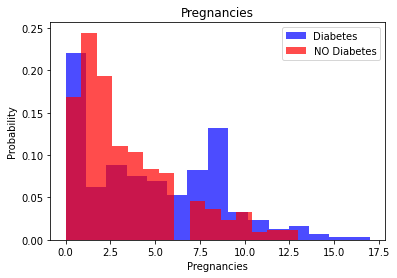

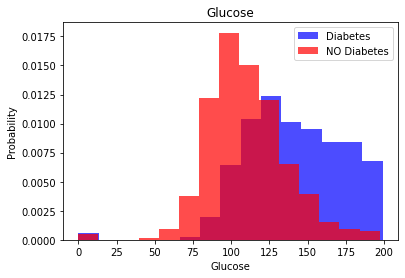

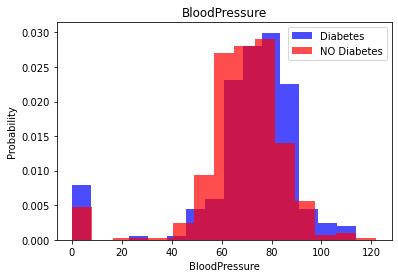

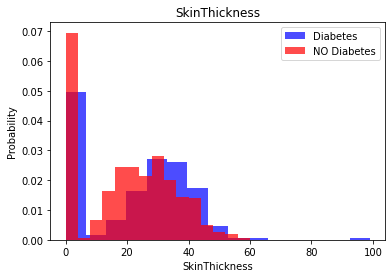

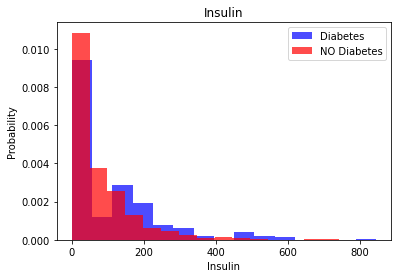

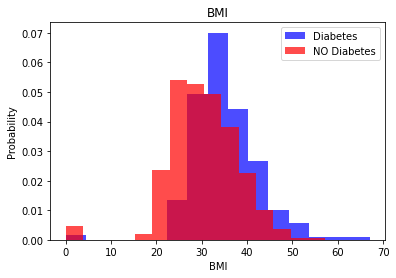

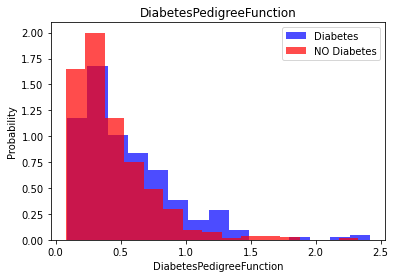

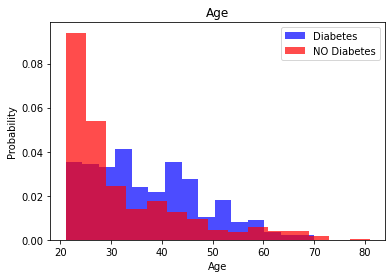

In [202]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue', label="Diabetes",alpha=0.7,density=True, bins=15)
    plt.hist(df[df['Outcome']==0][label], color='red', label="NO Diabetes",alpha=0.7,density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [203]:
# See here based upon any single measure we cant tell whether the person will have diabetes or not
# So that where machine learning comes and helps us

In [204]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [205]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
data= np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [206]:
over=RandomOverSampler()
x, y=over.fit_resample(x,y)
#we are doing this to make the number of people having and not having
#diabetes equal so that our NN gives more accuracy
data= np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)
#this brought our accuracy now closer to 50, which initially was around 20 iirc

In [207]:
len(transformed_df[transformed_df["Outcome"]==1])


500

In [208]:
x_train, x_temp, y_train, y_temp= train_test_split(x,y, test_size=0.4,random_state=0)
x_valid, x_test, y_valid, y_test= train_test_split(x_temp,y_temp, test_size=0.5, random_state=0)
#we are using 60% of our data for training and 20% for validation and
# 20% for testing

In [209]:
#Now lets build our nueral net  model using keras
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    #16 means the neuron layer jaha se input le rhe hai is of size 16
    #relu me if x<=0 -->0
    #        if x>0  -->x
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    #this is our MODEL
])

In [210]:
#Now lets compile our model
#We need an optimizer also. Tensorflow has a lot of them, but the most
#famous is Adam, so I am going to use that
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              #this is our loss function
              #since I am using Binary Classification, so I will use
              #BinaryCrossentropy
              metrics=['accuracy'])
            #Just added a metric(column) to know the accuracy of our model
#this is our optimizer

In [211]:
#So uptil now we have our model which is ready and compiled to whom
# we can train our data and see the outputs

In [212]:
model.evaluate(x_train,y_train)

19/19 [==============================] - 0s 1ms/step - loss: 0.7345 - accuracy: 0.5067


[0.7345028519630432, 0.5066666603088379]

In [213]:
model.evaluate(x_valid,y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.5850


[0.7033054232597351, 0.5849999785423279]

In [214]:
model.fit(x_train,y_train, batch_size=16, epochs=20, validation_data=(x_valid,y_valid))
#batch size bole to ek bar kitne logo ke dekhrele hai

Epoch 1/20
38/38 [==============================] - 1s 3ms/step - loss: 0.6961 - accuracy: 0.5650 - val_loss: 0.6498 - val_accuracy: 0.6600
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.6933 - val_loss: 0.6121 - val_accuracy: 0.7200
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5974 - accuracy: 0.7317 - val_loss: 0.5821 - val_accuracy: 0.7200
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7467 - val_loss: 0.5570 - val_accuracy: 0.7250
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7500 - val_loss: 0.5396 - val_accuracy: 0.7300
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7567 - val_loss: 0.5300 - val_accuracy: 0.7250
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7567 - val_loss: 0.5255 - val_accuracy: 0.7300
Epoch 8/20
38/38 [==

In [215]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7650


[0.4843342900276184, 0.7649999856948853]

In [ ]:
#Our accuracy is 77% which is good because we have seen this data before

In [ ]:
#So this is how we use tensorflow to build our nueral network to predict
#whether or not women has diabetes or not based on the some data we were
# given
